In [23]:
import sys 
import os 
import string as s 
import json 
from sqlalchemy import * 
import numpy as np

from datetime import * 
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


In [24]:
# Dedup data in different database management tool.
# Get dataset back to Python environment 
#After getting dataframe clean up columns not needed
df = pd.read_csv('C:\Users\cwang\Documents\DAT_SF_14\project\cindyhintdedupfinalversion.csv')
df['y'] = df.responsenum 
print df.shape
print df.info()

(917090, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 917090 entries, 0 to 917089
Data columns (total 25 columns):
gender            917090 non-null object
relative          917090 non-null int64
birthyear         917090 non-null int64
namecount         917090 non-null int64
first             917090 non-null int64
middle            917090 non-null int64
last              917090 non-null int64
eventsum          917090 non-null int64
birth             917090 non-null int64
residence         917090 non-null int64
death             917090 non-null int64
marriage          917090 non-null int64
burial            917090 non-null int64
arrival           917090 non-null int64
military          917090 non-null int64
occupation        917090 non-null int64
divorce           917090 non-null int64
birthstate        917090 non-null object
birthregion       917090 non-null object
birthsubregion    917090 non-null object
gendernum         917090 non-null int64
responsenum       917090 non-nul

In [25]:
df.drop('responsenum', axis=1, inplace=True)
df.drop('gendernum', axis=1, inplace=True)
print df.shape
print df.head()
print df.info()


(917090, 23)
  gender  relative  birthyear  namecount  first  middle  last  eventsum  \
0      f         0       1781          2      1       0     1         1   
1      m         0          0          0      0       0     0         0   
2      f         0          0          2      1       0     1         0   
3      f         0          0          2      1       1     0         0   
4      f         1          0          2      1       0     1         1   

   birth  residence ...  arrival  military  occupation  divorce  birthstate  \
0      1          0 ...        0         0           0        0      non-us   
1      0          0 ...        0         0           0        0        none   
2      0          0 ...        0         0           0        0        none   
3      0          0 ...        0         0           0        0        none   
4      1          0 ...        0         0           0        0        none   

   birthregion  birthsubregion date1920 hasrelative  y  
0   

In [26]:
df.describe()

,relative,birthyear,namecount,first,middle,last,eventsum,birth,residence,death,marriage,burial,arrival,military,occupation,divorce,date1920,hasrelative,y
count,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000,917090.000000
mean,0.684940,656.427492,2.068933,0.939553,0.225218,0.904162,0.618297,0.425749,0.040483,0.121023,0.018043,0.007364,0.001119,0.000389,0.000590,0.000785,0.822240,0.478430,0.035916
std,1.008863,902.373106,0.637255,0.238313,0.417726,0.294369,0.873431,0.498478,0.332129,0.326926,0.139514,0.085914,0.040129,0.022025,0.028534,0.029003,0.382311,0.499535,0.186080
min,0.000000,-922.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1862.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,26.000000,9179.000000,3.000000,1.000000,1.000000,1.000000,27.000000,10.000000,19.000000,5.000000,7.000000,7.000000,5.000000,4.000000,6.000000,2.000000,1.000000,1.000000,1.000000


In [27]:
#Explore Categorical variable

categorical_variables = ['gender','birthstate','birthregion','birthsubregion']

for x in np.arange(len(categorical_variables)):
    print 'x:', x, ' feature name: ', categorical_variables[x]
    print df[categorical_variables[x]].value_counts()
    print df.groupby(categorical_variables[x]).y.mean().order(ascending = False)
    



x: 0  feature name:  gender
f    467983
m    449107
dtype: int64
gender
m         0.039349
f         0.032621
Name: y, dtype: float64
x: 1  feature name:  birthstate
none              705152
non-us            103833
texas               6474
new york            6253
virginia            6132
pennsylvania        6009
california          5623
ohio                5473
north carolina      4320
illinois            4100
tennessee           4046
kentucky            3908
massachusetts       3881
georgia             3449
michigan            3417
indiana             3258
alabama             2678
louisiana           2325
missouri            2292
south carolina      2209
florida             2105
connecticut         2094
new jersey          2026
mississippi         1818
oklahoma            1805
arkansas            1741
maryland            1740
washington          1662
iowa                1647
kansas              1537
wisconsin           1421
minnesota           1409
utah                1392
colorado 

In [28]:
#encode features 
from sklearn import preprocessing
from sklearn.preprocessing import scale

df_numerical = df.copy()
encoder_dict = {}

for col in categorical_variables:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    encoder_dict[col] = le.classes_
    df_numerical[col] = le.transform(df[col])



In [29]:
print df_numerical.ix[:,0:22].head()

   gender  relative  birthyear  namecount  first  middle  last  eventsum  \
0       0         0       1781          2      1       0     1         1   
1       1         0          0          0      0       0     0         0   
2       0         0          0          2      1       0     1         0   
3       0         0          0          2      1       1     0         0   
4       0         1          0          2      1       0     1         1   

   birth  residence     ...       burial  arrival  military  occupation  \
0      1          0     ...            0        0         0           0   
1      0          0     ...            0        0         0           0   
2      0          0     ...            0        0         0           0   
3      0          0     ...            0        0         0           0   
4      1          0     ...            0        0         0           0   

   divorce  birthstate  birthregion  birthsubregion  date1920  hasrelative  
0        0     

In [30]:
print encoder_dict

{'birthregion': array(['midwest', 'non-us', 'none', 'northeast', 'south', 'west'], dtype=object), 'gender': array(['f', 'm'], dtype=object), 'birthstate': array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'florida', 'georgia',
       'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'non-us', 'none', 'north carolina', 'north dakota',
       'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island',
       'south carolina', 'south dakota', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'wisconsin', 'wyoming'], dtype=object), 'birthsubregion': array(['east north central', 'east south central', 'middle atlantic',
       'mountain', 'new england', 'non-us', 'non

In [31]:
#Get model dataset
X = pd.DataFrame(df_numerical.ix[:, 0:22],columns= df_numerical.ix[:, 0:22].columns)
X_names = df_numerical.ix[:, 0:22].columns
y = df_numerical.y
#X.describe()
#print df_numerical.describe()
#print df_numerical.shape

In [32]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                             accuracy_score, roc_auc_score)
from sklearn.tree import export_graphviz

In [33]:
# use original dataset to build model
x_axis = []
y_axis = []
for k in range(20)[2:]:
    dtc = DecisionTreeClassifier(max_depth=k,min_samples_leaf = 3000, class_weight= 'auto', random_state=1)
    #dtc = DecisionTreeClassifier(max_depth=k,random_state=1)
    scores = cross_val_score(dtc, X, y, cv=10, scoring='accuracy')
    #print 'For max depth:', k
    x_axis.append(k)
    #print 'Decision tree accuracy: {}'.format(np.mean(scores))
    y_axis.append(np.mean(scores))


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.93120522244968185, 0.93120522244968185, 0.93120522244968185, 0.93120522244968185, 0.93667034356914169, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875, 0.93687860479359875]


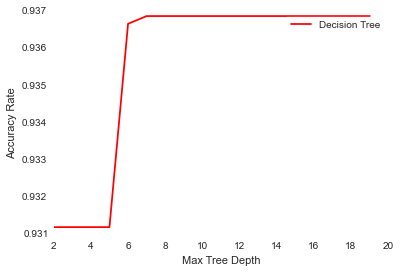

In [34]:

print x_axis
print y_axis

ig, ax = plt.subplots(1,1)
ax.plot(x_axis, y_axis, color='red', label = 'Decision Tree ')
ax.set_ylabel('Accuracy Rate')
ax.set_xlabel('Max Tree Depth')
ax.legend(loc='upper right',frameon=True)



In [35]:

print 'Optimal Max Tree Depth:', x_axis[y_axis.index(max(y_axis))]

Optimal Max Tree Depth: 7


In [43]:
from sklearn.metrics import accuracy_score
#Chose tree depth of 7 since it generates the best accurate rate
treeclf = DecisionTreeClassifier(max_depth=7, min_samples_leaf = 3000, class_weight= 'auto', random_state=1)
treeclf.fit(X, y)
y_pred = treeclf.predict(X)

#print confusion matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat )

print classification_report(y, y_pred, target_names=['Not Hint Generated', 'Hint Generated'])

#print out top 10 features
pd_features = pd.DataFrame({'feature':X.columns, 'importance':treeclf.feature_importances_}).sort(['importance'], ascending=False)
print pd_features.iloc[:10,]

#calculate true positive rate and false postive rate
y_comb = pd.DataFrame({'y':y, 'y_pred':y_pred }) 

#true positive rate
print 'True Positive Rate:', y_comb[y_comb.y == 1].y_pred.mean()
#false positive rate
print 'False Positive Rate:', y_comb[y_comb.y == 0].y_pred.mean()
print 'Accuracy score:', accuracy_score(y, y_pred)

[[824820  59332]
 [   115  32823]]
                    precision    recall  f1-score   support

Not Hint Generated       1.00      0.93      0.97    884152
    Hint Generated       0.36      1.00      0.52     32938

       avg / total       0.98      0.94      0.95    917090

           feature  importance
10           death    0.949017
8            birth    0.032433
1         relative    0.007959
21     hasrelative    0.003125
19  birthsubregion    0.002307
2        birthyear    0.001967
3        namecount    0.001844
7         eventsum    0.000687
18     birthregion    0.000486
17      birthstate    0.000175
True Positive Rate: 0.9965085919
False Positive Rate: 0.0671061084519
Accuracy score: 0.935178662945


In [37]:
def plot_roc_curve(y_test, p_proba):
    # calculates: false positive rate, true positive rate, 
    fpr, tpr, thresholds = roc_curve(y_test, p_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= 'AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

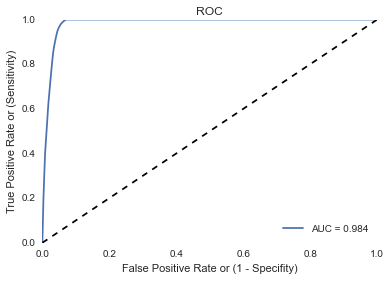

In [38]:
#ROC curve
p_proba = treeclf.predict_proba(X)
plot_roc_curve(y, p_proba)

In [39]:
with open("C:\Users\cwang\Documents\DAT_SF_14\project\image\HintGenerationTree_balance.dot", 'wb') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=X.columns)
    

In [18]:
# Visualize the tree at cmd line
# dot -Tpng HintGenerationTree.dot -o HintGenerationTreeView.png  --or--  dot -Tpng outtree.dot -o treeview.png

In [40]:
#Get Tree structure and print out leave summary stats into excel
def get_criteria(nodelist):
    #print "Call get_criteria:"
    criteria = ''
    #print nodelist
    for item in nodelist:

        try:
            feature = item[3]
            threshholder = item[2]
            split = item[1]
        except(IndexError):
            continue 

        if split == 'l': splitsymbol = '<='
        if split == 'r': splitsymbol = '>'
        node_crit = '(df[\'' + feature + '\'] ' + splitsymbol + ' ' + str(threshholder) + ') & '
        criteria += node_crit
    #print "get_criteria return:", criteria
    return criteria[:-3]

def get_lineage(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    #print "Features:", features

    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'

        lineage.append([parent, split, threshold[parent], features[parent]])

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)

    return_criteria = []

    for child in idx:
        nodelist = []
        for node in recurse(left, right, child):
            #print node
            nodelist.append(node)
        #print nodelist

        criteria = get_criteria(nodelist)
        #print criteria
        return_criteria.append(criteria)
    
    return return_criteria


In [41]:
# df is the dataframe with target variable
def leaf_pct(criteria, df):

    outleaf = open('C:\Users\cwang\Documents\DAT_SF_14\project\image\hint_balance_leaf_stats.txt', 'w')

    outleaf.write('\t'.join(['Conditions', 'HintGenerateRate', 'Leaf Size']))
    outleaf.write('\n')

    for conditions in criteria:
        
        code = 'subdf = df[' + conditions + ']'
        exec(code)

        outleaf.write('\t'.join([conditions, str(subdf['y'].mean()), str(subdf['y'].count())]))
        outleaf.write('\n')

In [42]:
#execute function to get leaf stats
criteria = get_lineage(treeclf, X_names)
leaf_pct(criteria, df_numerical)
